https://github.com/fengdu78/lihang-code/blob/master/第01章%20统计学习方法概论/1.Introduction_to_statistical_learning_methods.ipynb
本书代码的学习地址

In [1]:
import torch
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

a = torch.FloatTensor([1,2,3])
a

tensor([1., 2., 3.])

In [2]:
# 定义函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 定义多项式 numpy.poly1d([1,2,3]) 生成  $1x^2+2x^1+3x^0
def poly_func(p, x):
    """
    :param p: 多项式系数向量，其中从左往右降维
    :param x: 多项式未知数x
    :return:  p 阶多项式
    """
    f = np.poly1d(p)
    return f(x)

# 定义残差，使用最小二乘法必须把残差定义，并且参数中需包含残差函数的参数
def residuals_func(p, x, y):
    """
    :param p: 残差中多项式的阶数
    :param x: 残差中，多项式参数
    :param y: 用来减去的原数据
    :return: 残差函数
    """
    f = poly_func(p, x) - y
    return f

In [3]:
# 取十个点
x_real = np.linspace(0, 1, 10)
y_real = real_func(x_real)
# 引入噪声，生成数据
y_data = [np.random.normal(0, 0.1) + y1 for y1 in y_real]

In [4]:
x_points = np.linspace(0, 1, 1000)
def fitting(m):
    """
    :param m: 多项式参数数量
    """
    # 随机初始化多项式参数,为0-1之间m+1个
    p_init = np.random.rand(m+1)
    # 最小二乘法
    p_lesq = leastsq(residuals_func, p_init, args=(x_real, y_data))
    print('Fitting Parameters:', p_lesq[0])
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, poly_func(p_lesq[0], x_points), label='fitted curve')
    plt.plot(x_real, y_data, 'bo', label='noise')
    plt.legend()
    plt.show()
    return p_lesq

Fitting Parameters: [0.0261235]


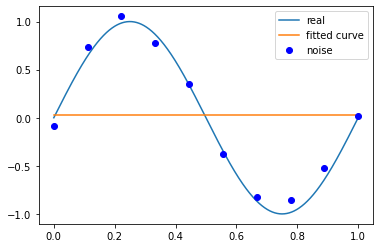

In [6]:
a = np.random.rand(100)
p_lesq_0 = fitting(0)

Fitting Parameters: [ 20.85624225 -31.25899146  10.59693498  -0.06721059]


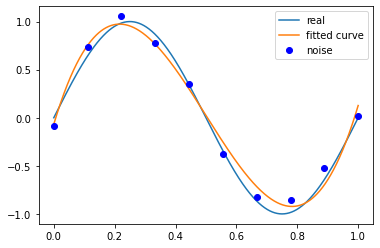

In [7]:
p_lesq_1 = fitting(3)

Fitting Parameters: [-1.53297881e+04  7.07801255e+04 -1.37496829e+05  1.45879215e+05
 -9.17693750e+04  3.47388917e+04 -7.62141941e+03  8.47935237e+02
 -2.86481465e+01 -8.77704180e-02]


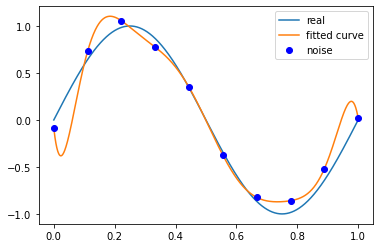

In [8]:
p_lesq_2 = fitting(9)
